<a href="https://colab.research.google.com/github/Roohika/Roohika/blob/main/Roohika_Cross_sell_prediction(feynn_labs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

!pip install imblearn

from sklearn.metrics import accuracy_score, f1_score,auc

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/train.csv') 
df.shape

(381109, 12)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [ ]:
df.isna()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


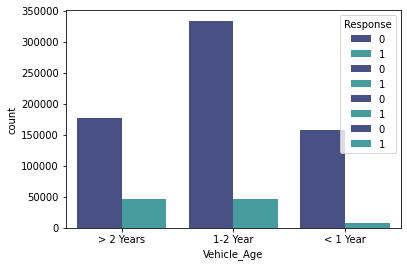

In [ ]:

sns.countplot(x='Vehicle_Age',hue='Response',data=df,palette="mako")

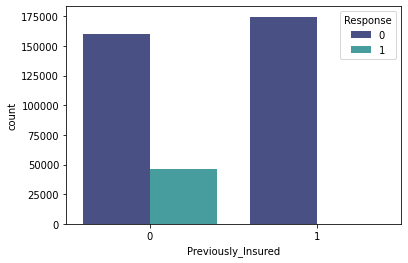

In [ ]:

sns.countplot(x='Previously_Insured',hue='Response',data=df,palette="mako") 


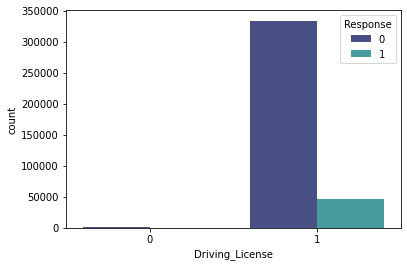

In [ ]:
sns.countplot(x='Driving_License',hue='Response',data=df,palette="mako") 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


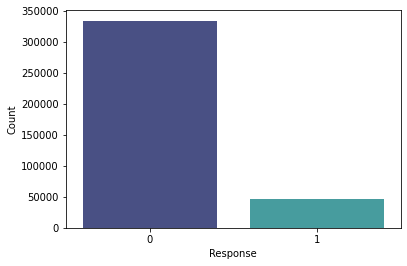

In [ ]:
Response = df.loc[:,"Response"].value_counts().rename('Count')
plt.xlabel("Response")
plt.ylabel('Count')
sns.barplot(Response.index , Response.values,palette="mako")

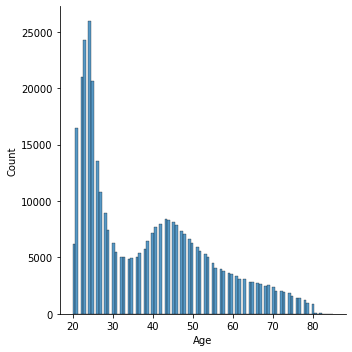

In [ ]:
sns.displot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


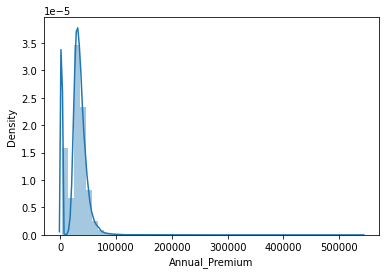

In [ ]:
sns.distplot(df['Annual_Premium'])

In [ ]:
def data_prep(df):

    df= df.drop(columns=['id','Policy_Sales_Channel','Vintage'])

    df=pd.get_dummies(df,columns=['Gender'] ,prefix='Gender')

    df=pd.get_dummies(df,columns=['Vehicle_Damage'] ,prefix='Damage')

    df=pd.get_dummies(df,columns=['Driving_License'] ,prefix='License')

    df=pd.get_dummies(df,columns=['Previously_Insured'] ,prefix='prev_insured')

    df["Age"] = pd.cut(df['Age'], bins=[0, 29, 35, 50, 100])

    df['Age']= df['Age'].cat.codes

    df['Annual_Premium'] = pd.cut(df['Annual_Premium'], bins=[0, 30000, 35000,40000, 45000, 50000, np.inf])

    df['Annual_Premium']= df['Annual_Premium'].cat.codes

    df['Vehicle_Age'] =df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

    df.drop(columns=['Region_Code'],inplace= True)

    return df
df1=data_prep(df)

In [ ]:
Features= ['Age','Vehicle_Age','Annual_Premium',"Gender_Female","Gender_Male","Damage_No","Damage_Yes",

"License_0","License_1" ,"prev_insured_0", "prev_insured_1"]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(df1[Features],df1['Response'],
                                   test_size = 0.3, random_state = 101) 
X_train.shape,X_test.shape

((266776, 11), (114333, 11))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=.5,random_state=3,)

X_train,Y_train  = RUS.fit_resample(df1[Features],df1['Response'])

In [ ]:
def performance_met(model,X_train,Y_train,X_test,Y_test):
  acc_train=accuracy_score(Y_train, model.predict(X_train))

  f1_train=f1_score(Y_train, model.predict(X_train))

  acc_test=accuracy_score(Y_test, model.predict(X_test))

  f1_test=f1_score(Y_test, model.predict(X_test))

  print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

  print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train) 
performance_met(model,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.7471847570113466 f1:0.6866392463845031
test score: accuracy:0.7187863521467993 f1:0.41871564940700023


In [ ]:
model_DT= DecisionTreeClassifier(random_state=1) 
model_DT.fit(X_train,Y_train) 
performance_met(model_DT,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.7578106044387355 f1:0.6603414800136111
test score: accuracy:0.7739410318980522 f1:0.43228045512454427


In [ ]:
Forest= RandomForestClassifier(random_state=1) 
Forest.fit(X_train,Y_train) 
performance_met(Forest,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.7578106044387355 f1:0.6604434305839035
test score: accuracy:0.7737573578931717 f1:0.43215595021184106


In [ ]:
rf= RandomForestClassifier(random_state=1)

parameters = {

    'bootstrap': [True],

'max_depth': [20, 25],

'min_samples_leaf': [3, 4],

'min_samples_split': [100,300],

}

grid_search_1 = GridSearchCV(rf, parameters, cv=3, verbose=2, n_jobs=-1)

grid_search_1.fit(X_train, Y_train)

performance_met(grid_search_1,X_train,Y_train,X_test,Y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
train score: accuracy:0.7576964247484479 f1:0.6605889761890482
test score: accuracy:0.7736436549377695 f1:0.4324312469845168
